https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/

https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [22]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, make_blobs

In [23]:
data = load_wine()
data = pd.DataFrame(data.data, columns=data.feature_names)
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [24]:
data.shape

(178, 13)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
data_sc = StandardScaler().fit_transform(data)
data_sc[:4]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383]])

In [27]:
# data_sc = np.array(data).reshape((-1,1))
# data['alcohol'] = data["alcohol"].reshape((-1,1))
# data["alcohol_std"] = data[["alcohol"]].apply(StandardScaler().fit_transform)
# data.head()

In [28]:
data_sc = MinMaxScaler().fit_transform(data)
data_sc[:4]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665]])

# 1. Box Plot

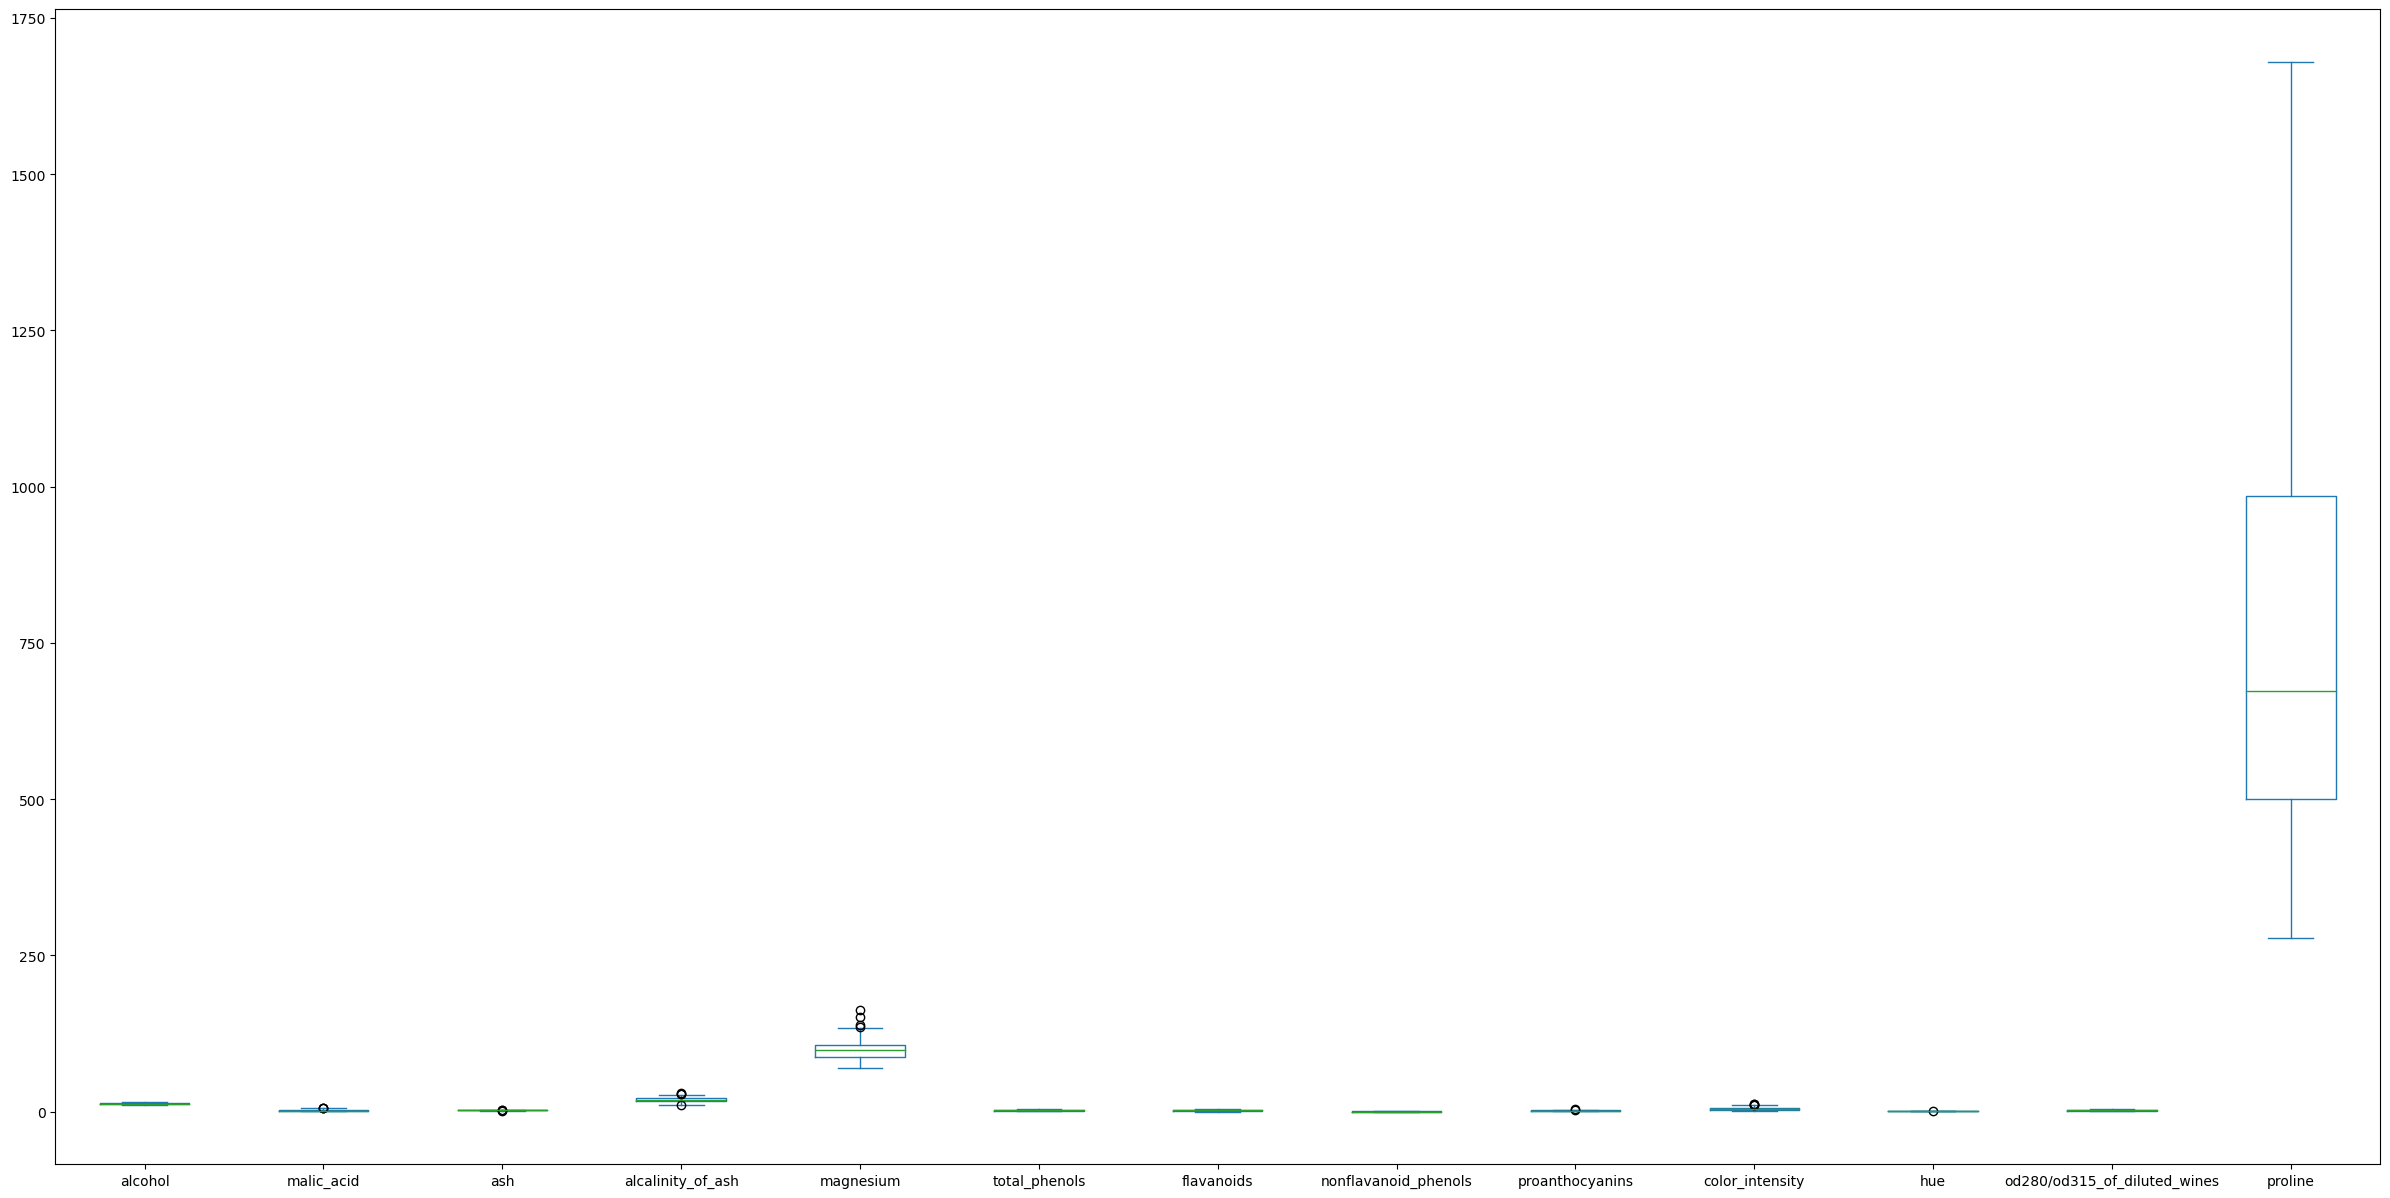

In [34]:
data.plot(kind='box', figsize=(30, 15))
plt.show()

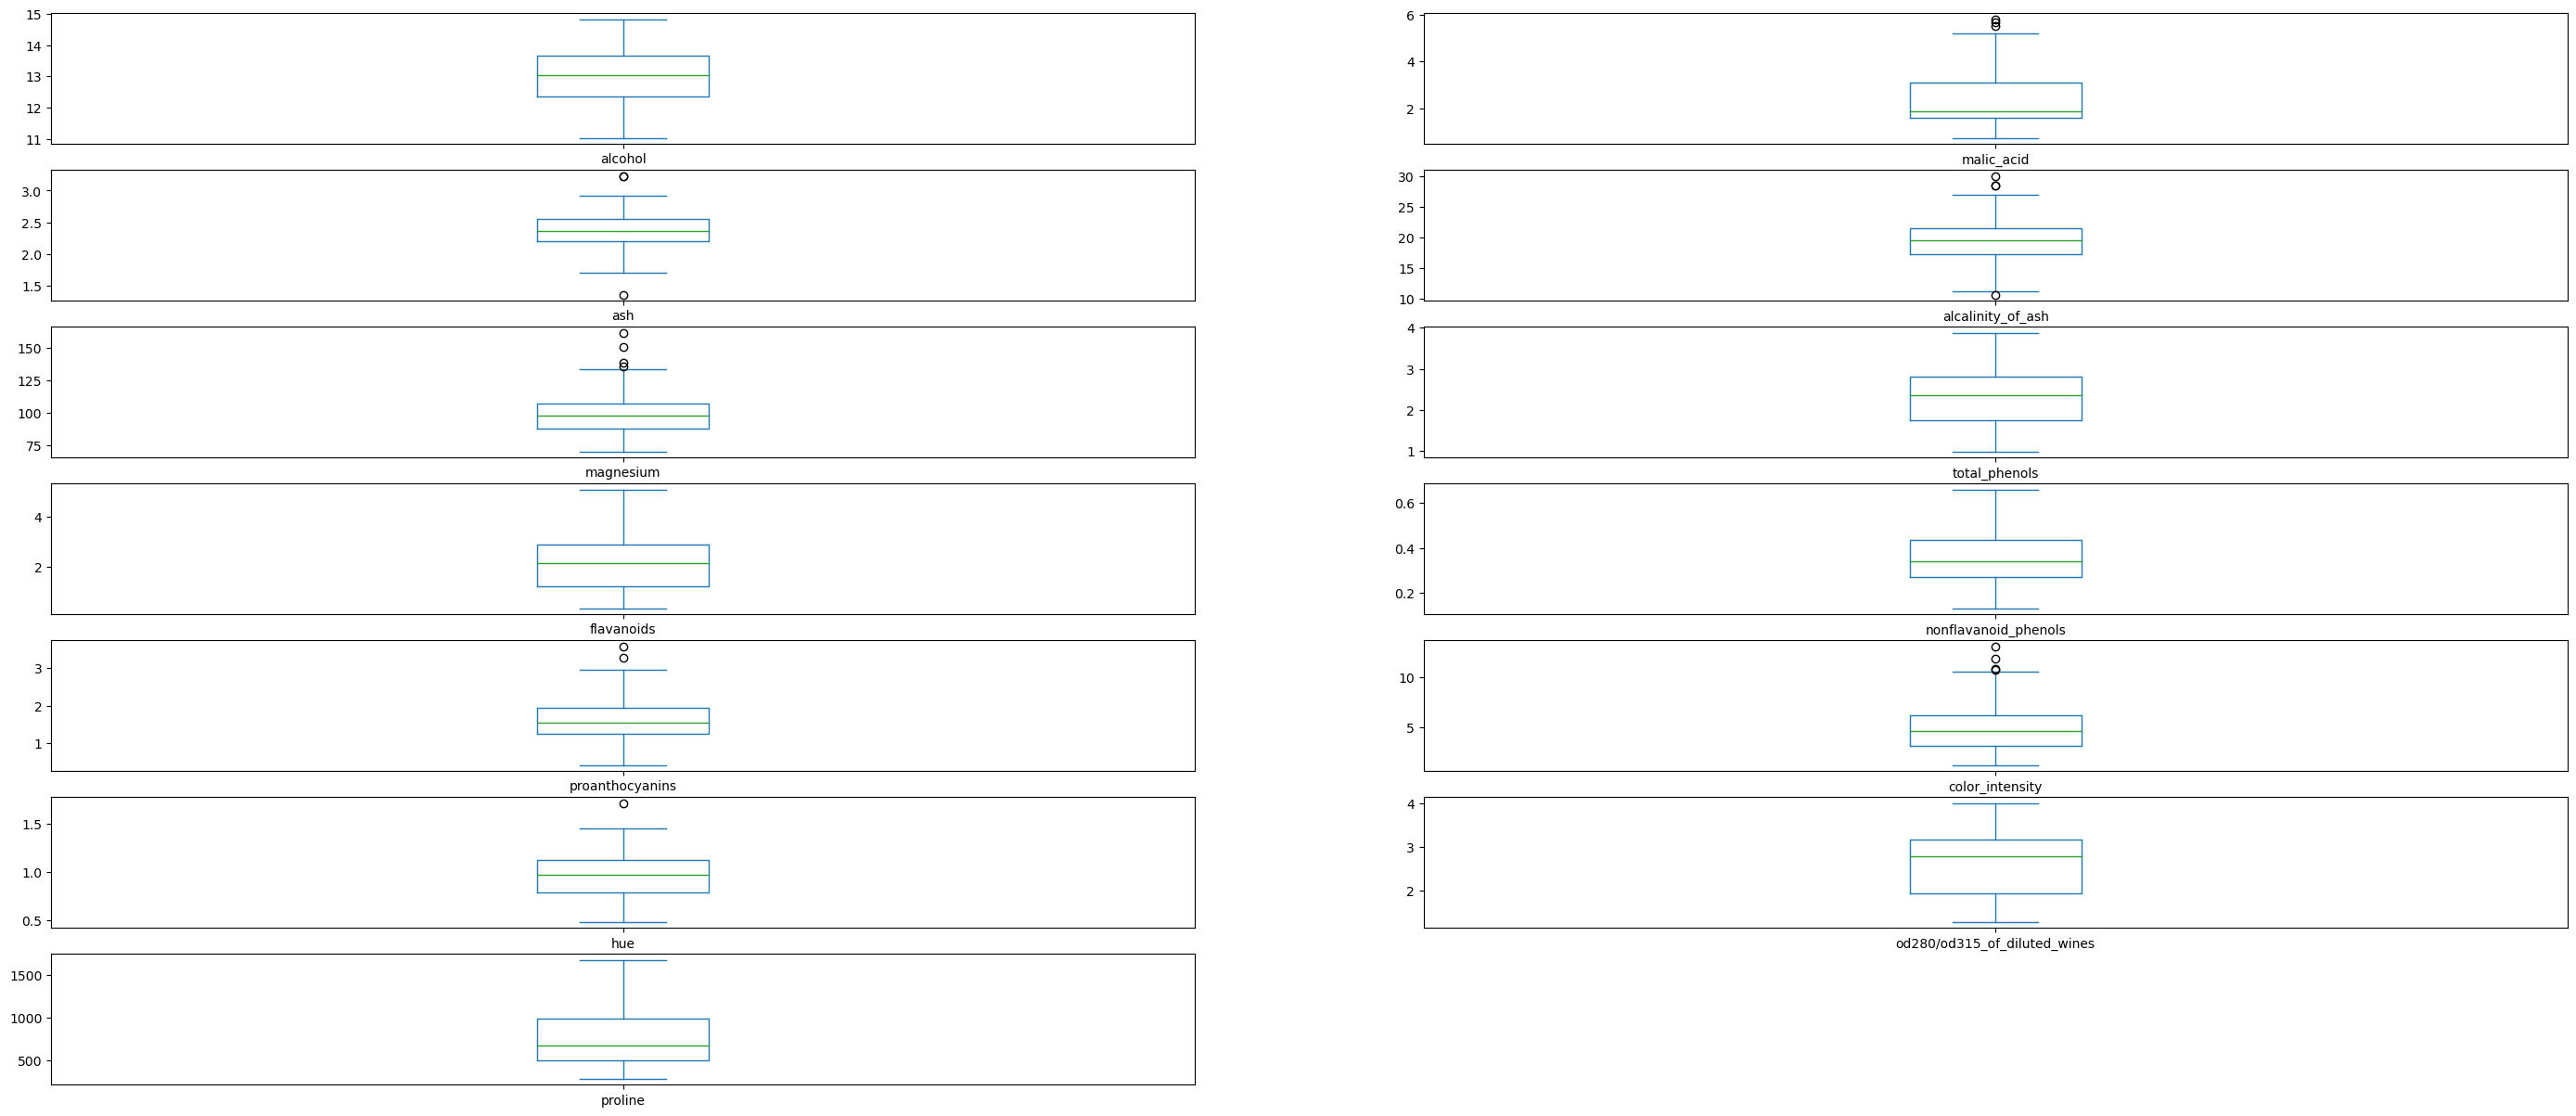

In [35]:
data.plot(kind='box', subplots=True, layout=(7, 2), figsize=(35, 15))
plt.show()

# 2. IQR Method

In [75]:
def IQR_Outlier(data, factor):
    outlier_list = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    min_lebel = q1 - (IQR*factor)
    max_lebel = q3 + (IQR*factor)
    for i in data:
        if (i<min_lebel) or (max_lebel<i):
            outlier_list.append(i)
    return outlier_list
IQR_Outlier(data.alcohol,1)

[11.03]

# 3. Z-Score Method

In [63]:
def findOutliers(data, thres):
    outlier_list = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        i_temp = (i - mean)/std
        if(np.abs(i_temp) > thres):
            outlier_list.append(i)
    return outlier_list
outlier = findOutliers(data.alcohol,2)

[14.83, 14.75, 11.03]

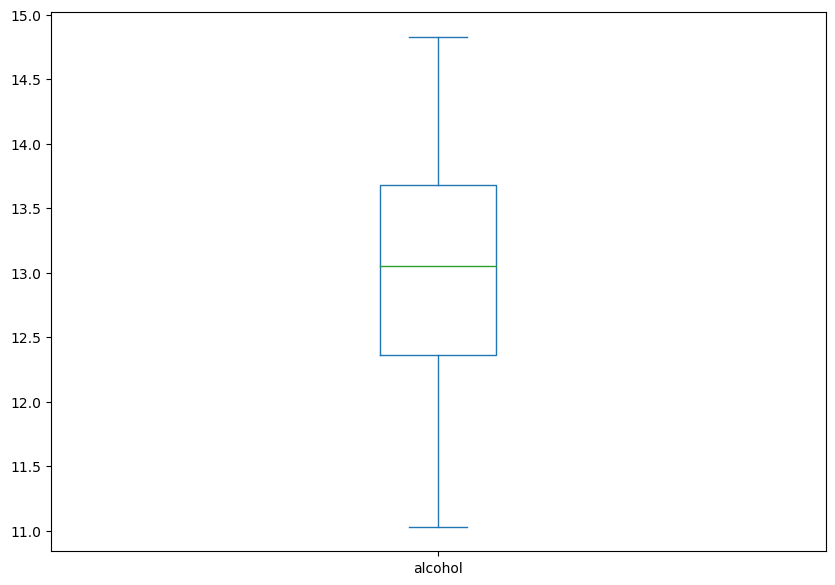

In [64]:
data.alcohol.plot(kind='box', figsize=(10, 7))
plt.show()

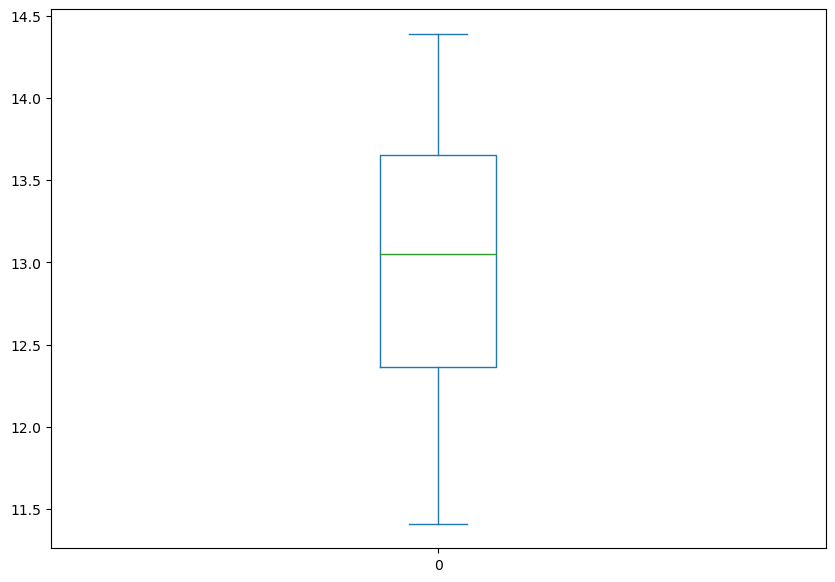

In [65]:
def removeOutliers(data, thres):
    outlier_list = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        i_temp = (i - mean)/std
        if(np.abs(i_temp) <= thres):
            outlier_list.append(i)
    return outlier_list
alc_data = removeOutliers(data.alcohol,2)
alc_data = pd.DataFrame(alc_data)
alc_data.plot(kind='box', figsize=(10, 7))
plt.show()

# 4. Distance from mean Method

In [76]:
# def distanceEuclidean(data, )